# HR_DT DATASET
Using the above dataset to build a Model using Decision Tree and Random Forest Classifier to predict the role of the employee.

## BUSINESS OBJECTIVE
* Maximize Accurate prediction
* Minimize Errors

## CONSTRAINTS
* Incorrect entry


## DATA DICTIONARY

| **slno** |          **Name of Feature**          | **Description**                     | **Type** | **Relevance** |
|:--------:|:--------------------------------------|:------------------------------------|:--------:|:-------------:|
| 1        | Position of the employee              | Role of the employee in the company | Nominal  | Relevant      |
| 2        | no of Years of Experience of employee | Experience of the employee in years | Ratio    | Relevant      |
| 3        | monthly income of employee            | Monthly income of the employee      | Ratio    | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass16\HR_DT.csv")
df=df0.copy()
df.head()

,Position of the employee,no of Years of Experience of employee,monthly income of employee
0,Business Analyst,1.1,39343
1,Junior Consultant,1.3,46205
2,Senior Consultant,1.5,37731
3,Manager,2.0,43525
4,Country Manager,2.2,39891


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(196, 3)

In [4]:
df.dtypes

Position of the employee                  object
no of Years of Experience of employee    float64
 monthly income of employee                int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Position of the employee               196 non-null    object 
 1   no of Years of Experience of employee  196 non-null    float64
 2    monthly income of employee            196 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.7+ KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,no of Years of Experience of employee,monthly income of employee
count,196.000000,196.000000
mean,5.112245,74194.923469
std,2.783993,26731.578387
min,1.000000,37731.000000
25%,3.000000,56430.000000
50%,4.100000,63831.500000
75%,7.100000,98273.000000
max,10.500000,122391.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  38


Removing the duplicate values using drop_duplicates function. 

In [8]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

Checking the Number and Percentage of Missing Values in the Dataset.

In [9]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 Position of the employee                 0
no of Years of Experience of employee    0
 monthly income of employee              0
dtype: int64


In [10]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Position of the employee                 10
no of Years of Experience of employee    29
 monthly income of employee              30
dtype: int64


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [11]:
df.mean()

C:\Users\lenny\AppData\Local\Temp\ipykernel_25204\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


no of Years of Experience of employee        5.012025
 monthly income of employee              73376.063291
dtype: float64

In [12]:
df.median()

C:\Users\lenny\AppData\Local\Temp\ipykernel_25204\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


no of Years of Experience of employee        4.05
 monthly income of employee              63218.00
dtype: float64

In [13]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_25204\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)
C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\lenny\AppData\Local\Temp\ipykernel_25204\4235401754.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/r

ModeResult(mode=array([['Partner', 4.0, 56957]], dtype=object), count=array([[20, 13,  7]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [14]:
df.var()

C:\Users\lenny\AppData\Local\Temp\ipykernel_25204\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


no of Years of Experience of employee    7.786542e+00
 monthly income of employee              7.182536e+08
dtype: float64

In [15]:
df.std()

C:\Users\lenny\AppData\Local\Temp\ipykernel_25204\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


no of Years of Experience of employee        2.790438
 monthly income of employee              26800.254391
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [16]:
df.skew()

C:\Users\lenny\AppData\Local\Temp\ipykernel_25204\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


no of Years of Experience of employee    0.514377
 monthly income of employee              0.497680
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [17]:
df.kurt()

C:\Users\lenny\AppData\Local\Temp\ipykernel_25204\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


no of Years of Experience of employee   -0.873841
 monthly income of employee             -1.127156
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

C:\Users\lenny\AppData\Local\Temp\ipykernel_25204\522995607.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

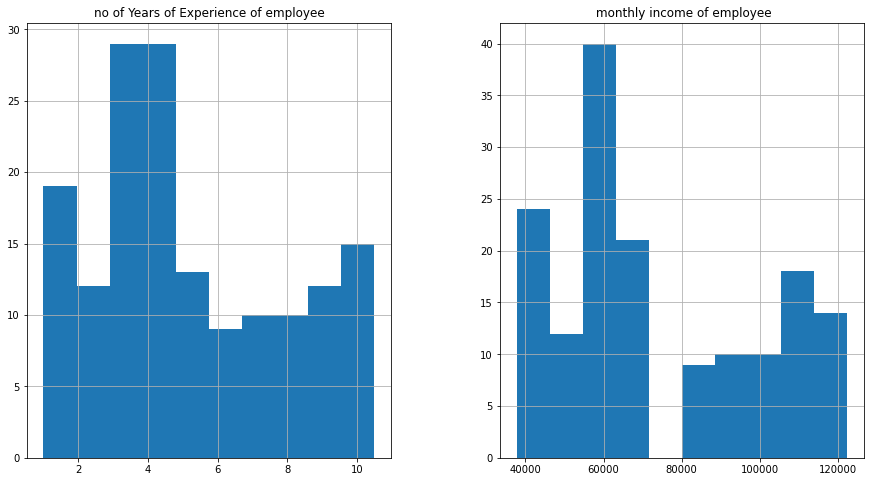

In [18]:
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
df.hist(ax=ax)
plt.show

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


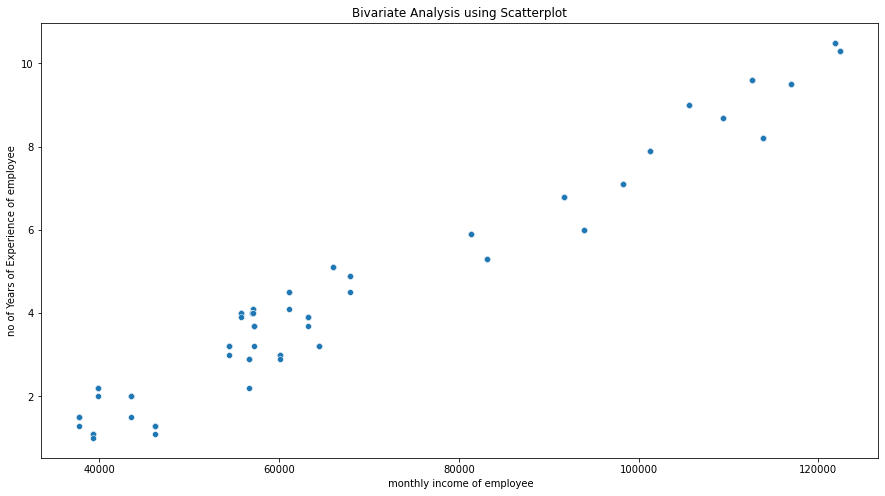

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(df[' monthly income of employee'],df['no of Years of Experience of employee'])
plt.title("Bivariate Analysis using Scatterplot")
plt.show()

Plotting boxplots of each variable.

In [20]:
df.columns

Index(['Position of the employee', 'no of Years of Experience of employee',
       ' monthly income of employee'],
      dtype='object')

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no of Years of Experience of employee'>

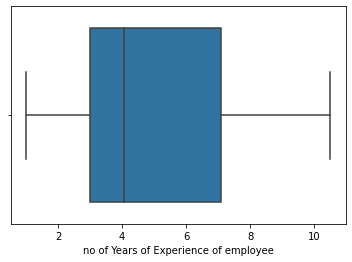

In [21]:
sns.boxplot(df['no of Years of Experience of employee'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' monthly income of employee'>

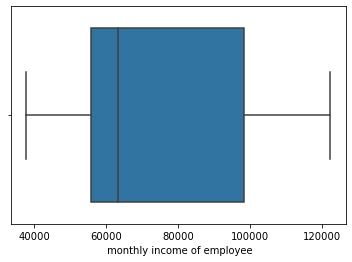

In [22]:
sns.boxplot(df[' monthly income of employee'])

from the boxplots it is clear that there are no outliers in the continuous variables.

Discretizing the the target variable ('Taxable.Income') as continuous data cannot be used for classification.

In [23]:
df[' monthly income of employee'] = df[' monthly income of employee'].apply(lambda x: '<80000' if x < 80000 else '>=80000')
df.head()

,Position of the employee,no of Years of Experience of employee,monthly income of employee
0,Business Analyst,1.1,<80000
1,Junior Consultant,1.3,<80000
2,Senior Consultant,1.5,<80000
3,Manager,2.0,<80000
4,Country Manager,2.2,<80000


One hot encoding the position of the employee columns.

In [24]:
encoder=OneHotEncoder()
enc_df=pd.DataFrame(encoder.fit_transform(df[['Position of the employee']]).toarray())
enc_df.columns=encoder.get_feature_names_out()
enc_df.head()

,Position of the employee_Business Analyst,Position of the employee_C-level,Position of the employee_CEO,Position of the employee_Country Manager,Position of the employee_Junior Consultant,Position of the employee_Manager,Position of the employee_Partner,Position of the employee_Region Manager,Position of the employee_Senior Consultant,Position of the employee_Senior Partner
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Joining the one hot encoded column to the original dataset. 

In [25]:
df=df.join(enc_df)
df.head()

,Position of the employee,no of Years of Experience of employee,monthly income of employee,Position of the employee_Business Analyst,Position of the employee_C-level,Position of the employee_CEO,Position of the employee_Country Manager,Position of the employee_Junior Consultant,Position of the employee_Manager,Position of the employee_Partner,Position of the employee_Region Manager,Position of the employee_Senior Consultant,Position of the employee_Senior Partner
0,Business Analyst,1.1,<80000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Junior Consultant,1.3,<80000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Senior Consultant,1.5,<80000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Manager,2.0,<80000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Country Manager,2.2,<80000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Dropping the position of the employee column. 

In [26]:
df.drop(['Position of the employee'],axis=1,inplace=True)
df.head()

,no of Years of Experience of employee,monthly income of employee,Position of the employee_Business Analyst,Position of the employee_C-level,Position of the employee_CEO,Position of the employee_Country Manager,Position of the employee_Junior Consultant,Position of the employee_Manager,Position of the employee_Partner,Position of the employee_Region Manager,Position of the employee_Senior Consultant,Position of the employee_Senior Partner
0,1.1,<80000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.3,<80000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.5,<80000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,<80000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.2,<80000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df.isna().sum().sort_values(ascending=False)

Position of the employee_Business Analyst     21
Position of the employee_C-level              21
Position of the employee_CEO                  21
Position of the employee_Country Manager      21
Position of the employee_Junior Consultant    21
Position of the employee_Manager              21
Position of the employee_Partner              21
Position of the employee_Region Manager       21
Position of the employee_Senior Consultant    21
Position of the employee_Senior Partner       21
no of Years of Experience of employee          0
 monthly income of employee                    0
dtype: int64

In [28]:
df.fillna(0,inplace=True)
df.isna().sum().sort_values(ascending=False)

no of Years of Experience of employee         0
 monthly income of employee                   0
Position of the employee_Business Analyst     0
Position of the employee_C-level              0
Position of the employee_CEO                  0
Position of the employee_Country Manager      0
Position of the employee_Junior Consultant    0
Position of the employee_Manager              0
Position of the employee_Partner              0
Position of the employee_Region Manager       0
Position of the employee_Senior Consultant    0
Position of the employee_Senior Partner       0
dtype: int64

### MODEL BUILDING

Splitting the data in to dependent and independent variable.

In [29]:
X=df.drop([' monthly income of employee'],axis=1)
Y=df[' monthly income of employee']

Splitting the X and Y data into train and test dataset using train_test_split function.

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

Assigning the column names to cols.

In [31]:
cols=X.columns

Scaling the train and test data of the independent variables.

In [32]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [33]:
X_train=pd.DataFrame(X_train,columns=[cols])
X_train.head()

,no of Years of Experience of employee,Position of the employee_Business Analyst,Position of the employee_C-level,Position of the employee_CEO,Position of the employee_Country Manager,Position of the employee_Junior Consultant,Position of the employee_Manager,Position of the employee_Partner,Position of the employee_Region Manager,Position of the employee_Senior Consultant,Position of the employee_Senior Partner
0,0.431579,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.610526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.315789,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.431579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
X_test=pd.DataFrame(X_test,columns=[cols])
X_test.head()

,no of Years of Experience of employee,Position of the employee_Business Analyst,Position of the employee_C-level,Position of the employee_CEO,Position of the employee_Country Manager,Position of the employee_Junior Consultant,Position of the employee_Manager,Position of the employee_Partner,Position of the employee_Region Manager,Position of the employee_Senior Consultant,Position of the employee_Senior Partner
0,0.391304,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.293478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.391304,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.206522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Creating a Decision Tree classifier object with criterion as entropy

In [35]:
model = DT(criterion='entropy',random_state=0) 

Training the classifier on the train data. 

In [36]:
model.fit(X_train, Y_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', random_state=0)

Evaluating the test data

In [37]:
preds = model.predict(X_test)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Accuracy of the test data.

In [38]:
accuracy_score(Y_test, preds)

0.96875

In [39]:
pd.crosstab(Y_test, preds, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,<80000,>=80000
Actual,,
<80000,18,0
>=80000,1,13


Evaluating the train data

In [40]:
preds1=model.predict(X_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Accuracy of the train data. 

In [41]:
accuracy_score(Y_train,preds1)

1.0

In [42]:
pd.crosstab(Y_train,preds1, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,<80000,>=80000
Actual,,
<80000,79,0
>=80000,0,47


### RANDOM FOREST CLASSIFIER
Loading the Random forest classifier from sklearn library. 

In [43]:
from sklearn.ensemble import RandomForestClassifier

Creating the classifier object

In [44]:
rf_classifier=RandomForestClassifier(criterion='entropy',n_estimators=100)

Training the classifier on the train data. 

In [45]:
rf_classifier.fit(X_train, Y_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier(criterion='entropy')

Evaluating the test data

In [46]:
preds_rf =rf_classifier.predict(X_test)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Accuracy of the test data.

In [47]:
accuracy_score(Y_test,preds_rf)

0.96875

In [48]:
pd.crosstab(Y_test,preds_rf, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,<80000,>=80000
Actual,,
<80000,18,0
>=80000,1,13


Evaluating the train data

In [49]:
preds_rf1=rf_classifier.predict(X_train)
accuracy_score(Y_train,preds_rf1)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


1.0

In [50]:
pd.crosstab(Y_train,preds_rf1, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,<80000,>=80000
Actual,,
<80000,79,0
>=80000,0,47


## CONCLUSION

Both Decision Tree and Random forest models are good as they both are giving the same accuracy.The accuracies are both high mostly because of the size of the dataset.  